# Merging CitiBike Data with Subway Entrance Data

In [9]:
import numpy as np
import pandas as pd
import geopandas as gp
import os
from shapely.geometry import Point

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing CitiBike Data
stations = pd.read_csv('../data/processed/stations.csv')
stations = stations.dropna()
geometry = gp.GeoSeries([Point(xy) for xy in zip(stations.Longitude, stations.Latitude)])
geometry = geometry.buffer(.0005)  # Using buffer of 0.0005
geo_stations = gp.GeoDataFrame(stations, geometry=geometry)
geo_stations.crs = {'init' :'epsg:4326'}
geo_stations.to_file('../data/interim/geo_stations')
geo_stations.head()

,Station_id,Station_Name,Location,Latitude,Longitude,geometry
0,72,W 52 St & 11 Ave,W 52 St & 11 Ave,40.767272,-73.993929,"POLYGON ((-73.99342888 40.76727216, -73.993431..."
1,79,Franklin St & W Broadway,Franklin St & W Broadway,40.719116,-74.006667,"POLYGON ((-74.00616660999999 40.71911552, -74...."
2,82,St James Pl & Pearl St,St James Pl & Pearl St,40.711174,-74.000165,"POLYGON ((-73.99966544999999 40.71117416, -73...."
3,83,Atlantic Ave & Fort Greene Pl,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,"POLYGON ((-73.97582328 40.68382604, -73.975825..."
4,116,W 17 St & 8 Ave,W 17 St & 8 Ave,40.741776,-74.001497,"POLYGON ((-74.00099745999999 40.74177603, -74...."


In [3]:
# Importing Subway Entrance Data
# Imported geojson file from https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=GeoJSON
subway_data = gp.read_file('../data/external/subway-entrances.geojson')
subway_data = subway_data[['geometry', 'line', 'name']]
subway_data = subway_data.dropna()
subway_data = subway_data.to_crs({'init' :'epsg:4326'})
subway_data.head()

,geometry,line,name
0,POINT (-73.99027199929638 40.68672833129772),F-G,Smith St & Bergen St At Ne Corner (To Manhatta...
1,POINT (-73.9906780008789 40.69372533216928),2-3-4-5-N-R,Court St & Montague St At Sw Corner
2,POINT (-73.99059199905471 40.69364233162101),2-3-4-5-N-R,Court St & Montague St At Sw Corner
3,POINT (-73.99253735666481 40.69439311951264),2-3-4-5-N-R,Clinton St & Montague St At Nw Corner
4,POINT (-73.96224891505983 40.66272735822238),B-Q-S,Flatbush Ave & Empire Blvd At Sw Corner


In [4]:
# Creating an inner join between CitiBike data and subway entrance data
aaron = gp.sjoin(geo_stations, subway_data, how = 'inner', op = 'intersects')
aaron.head()

,Station_id,Station_Name,Location,Latitude,Longitude,geometry,index_right,line,name
1,79,Franklin St & W Broadway,Franklin St & W Broadway,40.719116,-74.006667,"POLYGON ((-74.00616660999999 40.71911552, -74....",251,1,Varick St & Franklin St At Sw Corner (Downtown...
1,79,Franklin St & W Broadway,Franklin St & W Broadway,40.719116,-74.006667,"POLYGON ((-74.00616660999999 40.71911552, -74....",252,1,West Broadway & Franklin St At Sw Corner (Upto...
1,79,Franklin St & W Broadway,Franklin St & W Broadway,40.719116,-74.006667,"POLYGON ((-74.00616660999999 40.71911552, -74....",1890,1,Varick St & Franklin St At Nw Corner (Downtown...
15,151,Cleveland Pl & Spring St,Cleveland Pl & Spring St,40.722104,-73.997249,"POLYGON ((-73.99674900719999 40.7221037867, -7...",1351,4-6-6 Express,Lafayette St & Spring St At Sw Corner (Downtow...
15,151,Cleveland Pl & Spring St,Cleveland Pl & Spring St,40.722104,-73.997249,"POLYGON ((-73.99674900719999 40.7221037867, -7...",330,4-6-6 Express,27 Cleveland Place (Uptown Only)


In [5]:
# Grouping the important columns viz. CitiBike station id, Street Location and the subway line in proximity
a = aaron.groupby(['Station_id' , 'Location', 'line']).count()
a.head()

,,,Station_Name,Latitude,Longitude,geometry,index_right,name
Station_id,Location,line,,,,,,
79,Franklin St & W Broadway,1,3,3,3,3,3,3
151,Cleveland Pl & Spring St,4-6-6 Express,4,4,4,4,4,4
223,W 13 St & 7 Ave,1-2-3-L-F-M,2,2,2,2,2,2
257,Lispenard St & Broadway,4-6-6 Express-J-Z-N-Q-R,2,2,2,2,2,2
267,Broadway & W 36 St,B-D-F-M-N-Q-R,3,3,3,3,3,3


In [6]:
# Droping extraneous columns
a.drop(['Station_Name', 'Latitude', 'Longitude', 'geometry', 'index_right', 'name'], axis =1, inplace = True)
a.head()

,,
Station_id,Location,line
79,Franklin St & W Broadway,1
151,Cleveland Pl & Spring St,4-6-6 Express
223,W 13 St & 7 Ave,1-2-3-L-F-M
257,Lispenard St & Broadway,4-6-6 Express-J-Z-N-Q-R
267,Broadway & W 36 St,B-D-F-M-N-Q-R


In [13]:
# Creating index 1 for all CitiBike stations in proximity to subway entrances
a = a.reset_index()
a['subway_entrance'] = 1
a.head()

,Station_id,Location,line,subway_entrance
0,79,Franklin St & W Broadway,1,1
1,151,Cleveland Pl & Spring St,4-6-6 Express,1
2,223,W 13 St & 7 Ave,1-2-3-L-F-M,1
3,257,Lispenard St & Broadway,4-6-6 Express-J-Z-N-Q-R,1
4,267,Broadway & W 36 St,B-D-F-M-N-Q-R,1


In [8]:
# Save to CSV
a.to_csv('../data/processed/subway-entrances.csv')

In [7]:
len(a)

73

In [ ]:
# Count number of lines----  ??

In [14]:
a_count = a['line'].groupby(a['Station_id']).count()

In [16]:
len(a_count)

72

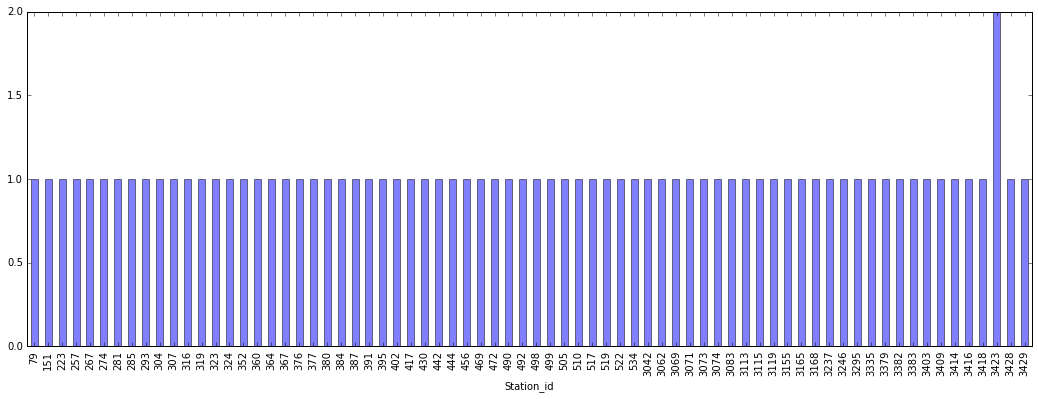

In [17]:
fig = plt.figure(figsize=(18,6))
#fig.add_subplot(711)

#plt.subplot(711)
a_count.plot(kind="bar", alpha=0.5)